In [291]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Times New Roman'

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from PIL import Image

import networkx as nx

import settings

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/victiny/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
"""Set up API"""
consumer_key = settings.twitter_consumer_key
consumer_key_secret = settings.twitter_consumer_key_secret
access_token = settings.twitter_access_token
access_token_secret = settings.twitter_access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


user = api.me()
print(user)

User(_api=<tweepy.api.API object at 0x1243a29a0>, _json={'id': 1311522424631054337, 'id_str': '1311522424631054337', 'name': 'Victiny', 'screen_name': 'Victiny8', 'location': '', 'profile_location': None, 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Thu Oct 01 04:24:57 +0000 2020', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1312814198141997056/0RrgAkkP_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1312814198141997056/0RrgAkkP_normal.jpg', 'pro

In [7]:
"""Extract tweets"""
tweets = []
for tweet in tweepy.Cursor(api.search,q="#BMES2020",count=100,
                           lang="en",).items():
    tweets.append(tweet)

print("Number of tweets extracted: {}. \n".format(len(tweets)))

Number of tweets extracted: 2407. 



In [27]:
"""Store the data into a pd.DataFrame"""
df  = pd.DataFrame([[tw.created_at, 
                     tw.text, 
                     len(tw.text), 
                     tw.id, 
                     tw.favorite_count, 
                     tw.retweet_count, 
                     tw.user.screen_name,
                     tw.user.id
                    ]
                     for tw in tweets],
                    columns=['Date', 'Tweet', 'Length', 'tweet_ID', 'Likes', 'Retweets', 'user_name', 'user_ID'])

# 10/10 ~ 10/18

Date                                              Tweet  \
2206 2020-10-13 23:13:58  Tufts BME is hiring in the area of tissue engi...   
1569 2020-10-14 20:26:42  RT @MadeleineOudin: Tufts BME is hiring in the...   
1689 2020-10-14 18:15:01  RT @MadeleineOudin: Tufts BME is hiring in the...   
1768 2020-10-14 17:15:27  RT @MadeleineOudin: Tufts BME is hiring in the...   
1811 2020-10-14 16:49:29  RT @MadeleineOudin: Tufts BME is hiring in the...   
...                  ...                                                ...   
2200 2020-10-13 23:34:08                Only a few days until #BMES2020 ! 😋   
2212 2020-10-13 22:15:00  #BMES2020 Poster Session Q&amp;A Thursday Octo...   
2292 2020-10-12 22:33:07  Discover unique educational and research oppor...   
2302 2020-10-12 18:09:34  Excited to share my poster at #BMES2020\n"Mult...   
2361 2020-10-11 19:58:55                            3 days to go! #BMES2020   

      Length             tweet_ID  Likes  Retweets        user_name  \
2206     140  1316155247052587008     58        32   MadeleineOudin   
1569     139  1316475542556733445      0        32         damolucy   
1689     139  1316442403415490567      0        32     Black_Lab_TU   
1768     139  1316427411664314368      0        32         ApsDsoft   
1811     139  1316420876502528001      0        32          Odeslab   
...      ...                  ...    ...       ...              ...   
2200      35  1316160322307149824      0         0     Grace0Morgan   
2212     144  1316140406422159360      0         0      SurgBioMech   
2292     140  1315782580822855681      0         0        BioengGMU   
2302     140  1315716255224127488      0         0  Mohamed3abdulah   
2361      23  1315381384421277698      0         0        meghankup   

                  user_ID  
2206            873812113  
1569  1086744622527905795  
1689           2216559002  
1768  1204795954605375488  
1811           2766790602  
...                   ...  
2200           1552543321  
2212  1290391665669214210  
2292            847900016  
2302            106864651  
2361             58073901  

[2407 rows x 8 columns]

In [57]:
df.sort_values(by=['Likes', 'Retweets'], ascending=False)

Date                                              Tweet  \
1144 2020-10-15 15:10:48  #ThrowbackThursday to BMES 2019. I had two tal...   
2355 2020-10-11 22:26:40  Sad to miss #BMES2020 this year, but also thri...   
1899 2020-10-14 15:41:23  Speaking of #BMES2020... last year  at Meet th...   
2005 2020-10-14 14:31:11  Happy #BMES2020 everyone!  show us how you're ...   
1936 2020-10-14 15:18:42  First BMES conferences as a postdoc! Of course...   
...                  ...                                                ...   
2200 2020-10-13 23:34:08                Only a few days until #BMES2020 ! 😋   
2212 2020-10-13 22:15:00  #BMES2020 Poster Session Q&amp;A Thursday Octo...   
2292 2020-10-12 22:33:07  Discover unique educational and research oppor...   
2302 2020-10-12 18:09:34  Excited to share my poster at #BMES2020\n"Mult...   
2361 2020-10-11 19:58:55                            3 days to go! #BMES2020   

      Length             tweet_ID  Likes  Retweets        user_name  \
1144     140  1316758430993076226    211        10        teamkorie   
2355     144  1315418567316254724    169         1       StoppelLab   
1899     140  1316403738475745281    105        11      AnaMaPorras   
2005     139  1316386073522712581     94         3        peytonlab   
1936     140  1316398030908731401     92         2  DrSimoneDouglas   
...      ...                  ...    ...       ...              ...   
2200      35  1316160322307149824      0         0     Grace0Morgan   
2212     144  1316140406422159360      0         0      SurgBioMech   
2292     140  1315782580822855681      0         0        BioengGMU   
2302     140  1315716255224127488      0         0  Mohamed3abdulah   
2361      23  1315381384421277698      0         0        meghankup   

                  user_ID  
1144   940421518017916933  
2355   826111707755978752  
1899            274832868  
2005           1131754932  
1936   760514726409433088  
...                   ...  
2200           1552543321  
2212  1290391665669214210  
2292            847900016  
2302            106864651  
2361             58073901  

[2407 rows x 8 columns]

In [63]:
df.loc[df.Likes.argmax(), 'Tweet']

AttributeError: 'str' object has no attribute 'head'

In [66]:
df.sort_values(by=['Retweets', 'Likes'], ascending=False).head(35)

Date                                              Tweet  \
2206 2020-10-13 23:13:58  Tufts BME is hiring in the area of tissue engi...   
1569 2020-10-14 20:26:42  RT @MadeleineOudin: Tufts BME is hiring in the...   
1689 2020-10-14 18:15:01  RT @MadeleineOudin: Tufts BME is hiring in the...   
1768 2020-10-14 17:15:27  RT @MadeleineOudin: Tufts BME is hiring in the...   
1811 2020-10-14 16:49:29  RT @MadeleineOudin: Tufts BME is hiring in the...   
1853 2020-10-14 16:12:46  RT @MadeleineOudin: Tufts BME is hiring in the...   
1948 2020-10-14 15:14:11  RT @MadeleineOudin: Tufts BME is hiring in the...   
2012 2020-10-14 14:26:55  RT @MadeleineOudin: Tufts BME is hiring in the...   
2108 2020-10-14 12:47:20  RT @MadeleineOudin: Tufts BME is hiring in the...   
2116 2020-10-14 12:21:57  RT @MadeleineOudin: Tufts BME is hiring in the...   
2131 2020-10-14 09:44:10  RT @MadeleineOudin: Tufts BME is hiring in the...   
2132 2020-10-14 09:02:12  RT @MadeleineOudin: Tufts BME is hiring in the...   
2133 2020-10-14 08:58:31  RT @MadeleineOudin: Tufts BME is hiring in the...   
2138 2020-10-14 07:16:06  RT @MadeleineOudin: Tufts BME is hiring in the...   
2143 2020-10-14 05:06:05  RT @MadeleineOudin: Tufts BME is hiring in the...   
2145 2020-10-14 04:40:53  RT @MadeleineOudin: Tufts BME is hiring in the...   
2151 2020-10-14 03:42:25  RT @MadeleineOudin: Tufts BME is hiring in the...   
2155 2020-10-14 03:21:08  RT @MadeleineOudin: Tufts BME is hiring in the...   
2156 2020-10-14 03:15:52  RT @MadeleineOudin: Tufts BME is hiring in the...   
2159 2020-10-14 02:50:33  RT @MadeleineOudin: Tufts BME is hiring in the...   
2163 2020-10-14 02:37:54  RT @MadeleineOudin: Tufts BME is hiring in the...   
2168 2020-10-14 02:21:06  RT @MadeleineOudin: Tufts BME is hiring in the...   
2169 2020-10-14 02:19:58  RT @MadeleineOudin: Tufts BME is hiring in the...   
2171 2020-10-14 02:08:44  RT @MadeleineOudin: Tufts BME is hiring in the...   
2172 2020-10-14 01:48:17  RT @MadeleineOudin: Tufts BME is hiring in the...   
2176 2020-10-14 01:27:52  RT @MadeleineOudin: Tufts BME is hiring in the...   
2179 2020-10-14 01:04:16  RT @MadeleineOudin: Tufts BME is hiring in the...   
2181 2020-10-14 00:47:40  RT @MadeleineOudin: Tufts BME is hiring in the...   
2183 2020-10-14 00:40:57  RT @MadeleineOudin: Tufts BME is hiring in the...   
2188 2020-10-14 00:12:55  RT @MadeleineOudin: Tufts BME is hiring in the...   
2204 2020-10-13 23:17:45  RT @MadeleineOudin: Tufts BME is hiring in the...   
2205 2020-10-13 23:14:50  RT @MadeleineOudin: Tufts BME is hiring in the...   
722  2020-10-16 13:22:33  Today's the day... congratulations to the 2020...   
323  2020-10-17 04:17:18  RT @CMBEjournal: Today's the day... congratula...   
544  2020-10-16 16:06:08  RT @CMBEjournal: Today's the day... congratula...   

      Length             tweet_ID  Likes  Retweets        user_name  \
2206     140  1316155247052587008     58        32   MadeleineOudin   
1569     139  1316475542556733445      0        32         damolucy   
1689     139  1316442403415490567      0        32     Black_Lab_TU   
1768     139  1316427411664314368      0        32         ApsDsoft   
1811     139  1316420876502528001      0        32          Odeslab   
1853     139  1316411636052156417      0        32      TheChungLab   
1948     139  1316396895330168832      0        32    valli_mallidi   
2012     139  1316384998719660034      0        32         RafatLab   
2108     139  1316359938189471745      0        32    natalierrubio   
2116     139  1316353547731193857      0        32   FuturePI_Slack   
2131     139  1316313843388293120      0        32     raechelledsa   
2132     139  1316303280138485765      0        32           SyisEu   
2133     139  1316302353411313664      0        32        DoloffLab   
2138     139  1316276580721795072      0        32       KatieRLong   
2143     139  1316243862013308928      0        32          cfwhitt   
2145     139  1316237518120067072      

In [68]:
df.loc[2206, 'Tweet']

'Tufts BME is hiring in the area of tissue engineering! @valli_mallidi and I will be at BMES - if you are interested… https://t.co/kKein65M5S'

In [28]:
df.Likes.describe()

count    2407.000000
mean        3.992522
std        11.274071
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       211.000000
Name: Likes, dtype: float64

In [29]:
df.Retweets.describe()

count    2407.000000
mean        4.744495
std         5.297542
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        32.000000
Name: Retweets, dtype: float64

In [34]:
df.user_name.value_counts().head(20)

NonprofitJenn     144
BMESociety        117
AnaMaPorras        38
Jamiem_benson      35
JasonCMarvin       32
BmesDiversity      31
peytonlab          31
BellasFATLab       30
FordVersyptLab     29
ANKoppes           28
profmikeking       27
LatinXinBME        26
setton_lab         26
meghankup          25
RafatLab           24
WPI_BME            24
WillitsLab         23
JohnAWhitePhD      21
DrPlattLab         21
Prof_Harley        20
Name: user_name, dtype: int64

In [35]:
"""Exclude the retweets"""
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]
df_own  = pd.DataFrame([[ot.created_at, 
                     ot.text, 
                     len(ot.text), 
                     ot.id, 
                     ot.favorite_count, 
                     ot.retweet_count,
                     ot.user.screen_name,
                     ot.user.id] for ot in own_tweets],
                    columns=['Date', 'Tweet', 'Length', 'ID', 'Likes', 'Retweets', 'user_name', 'user_ID'])
df_own

Date                                              Tweet  \
0   2020-10-18 03:07:37  Heard it was a big success @kentleach5 and @De...   
1   2020-10-18 00:57:59  As I'm thinking about my future more concretel...   
2   2020-10-18 00:44:54  @zoom_us, any chance you can partner with @Ube...   
3   2020-10-17 23:24:15  I was energized by #BMES2020. The program was ...   
4   2020-10-17 23:01:46  The #BMES2020 meeting was a great experience f...   
..                  ...                                                ...   
808 2020-10-10 23:35:58              Countdown to #BMES2020: 4 days to go!   
809 2020-10-10 16:05:34  Hi Sharon 👋 We love seeing so many #FirstGenIn...   
810 2020-10-10 15:42:13  So exciting that it’s only 4 days away!! #BMES...   
811 2020-10-10 15:30:00  Assistant Professor Jeremias Sulam (@Jere_Sula...   
812 2020-10-10 14:00:30  We can't wait to "see" everyone! Only 4 days l...   

     Length                   ID  Likes  Retweets       user_name  \
0       140  1317663599351967744      0         0  Immunoengineer   
1       140  1317630974847483905     13         0  ianmightbecool   
2       144  1317627682079887360      0         0        abhay_br   
3       140  1317607387143032832     43         3   JohnAWhitePhD   
4       140  1317601729161043968      3         0    EmmetFrancis   
..      ...                  ...    ...       ...             ...   
808      37  1315073621010853890      5         0       meghankup   
809     127  1314960274475094016      6         1   BmesDiversity   
810      74  1314954394941693953      2         1       Laaurr_11   
811     139  1314951321154465792     36         6          JHUBME   
812      90  1314928799163781121     24         3      BMESociety   

                 user_ID  
0    1316958471225593856  
1               14046945  
2             2519521142  
3    1129826680250482688  
4     973984580662251520  
..                   ...  
808             58073901  
809  1252695497338470400  
810           2321820766  
811           3317383055  
812            145264769  

[813 rows x 8 columns]

In [36]:
df_own.Likes.describe()

count    813.000000
mean      11.820418
std       16.851561
min        0.000000
25%        3.000000
50%        6.000000
75%       14.000000
max      211.000000
Name: Likes, dtype: float64

In [37]:
df_own.Retweets.describe()

count    813.000000
mean       1.956950
std        2.844382
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       32.000000
Name: Retweets, dtype: float64

In [70]:
df_own.sort_values(by=['Likes', 'Retweets'], ascending=False).head(10)

Date                                              Tweet  \
374 2020-10-15 15:10:48  #ThrowbackThursday to BMES 2019. I had two tal...   
800 2020-10-11 22:26:40  Sad to miss #BMES2020 this year, but also thri...   
629 2020-10-14 15:41:23  Speaking of #BMES2020... last year  at Meet th...   
669 2020-10-14 14:31:11  Happy #BMES2020 everyone!  show us how you're ...   
639 2020-10-14 15:18:42  First BMES conferences as a postdoc! Of course...   
296 2020-10-15 19:57:22  These uterus sweatshirts are officially my con...   
484 2020-10-14 23:18:29  Thankful for this great honor!  #BMES2020 http...   
464 2020-10-15 11:56:25  She’s not on Twitter but I have to give a shou...   
64  2020-10-17 15:01:44  Congratulations @Lola_UMich #BMES2020 on mid-c...   
718 2020-10-14 12:37:27  Attending #BMES2020 this year? Check out some ...   

     Length                   ID  Likes  Retweets        user_name  \
374     140  1316758430993076226    211        10        teamkorie   
800     144  1315418567316254724    169         1       StoppelLab   
629     140  1316403738475745281    105        11      AnaMaPorras   
669     139  1316386073522712581     94         3        peytonlab   
639     140  1316398030908731401     92         2  DrSimoneDouglas   
296     139  1316830546954080256     90         0     kaitlin_fogg   
484      65  1316518771494977538     81         5    pvandevord_VT   
464     139  1316709509776146432     77         7      AnaMaPorras   
64      140  1317480924691517441     74        15    profjoycewong   
718     140  1316357450468151297     70        10        MunsonOEL   

                user_ID  
374  940421518017916933  
800  826111707755978752  
629           274832868  
669          1131754932  
639  760514726409433088  
296  999035176842821632  
484  831894076849082368  
464           274832868  
64           1557992497  
718          2846164168

In [71]:
df_own.sort_values(by=['Retweets', 'Likes'], ascending=False).head(10)

Date                                              Tweet  \
741 2020-10-13 23:13:58  Tufts BME is hiring in the area of tissue engi...   
241 2020-10-16 13:22:33  Today's the day... congratulations to the 2020...   
335 2020-10-15 17:01:33  Thank you to all of our panelists for being op...   
278 2020-10-16 02:09:36  Friday at noon ET #GenderEquityinBME panel! He...   
64  2020-10-17 15:01:44  Congratulations @Lola_UMich #BMES2020 on mid-c...   
402 2020-10-15 14:30:02  3 ways to start forming engineering identities...   
581 2020-10-14 16:57:54  Having Fred Gray speak in our first Racial Jus...   
394 2020-10-15 14:40:14  Amazing talk from Dr. Aaron Kyle. Thank you fo...   
497 2020-10-14 21:08:15  Wow. Such a great panel!! 🔥🌈\n\nThank you @DrP...   
284 2020-10-16 00:44:31  If any students want to meet with me, I can te...   

     Length                   ID  Likes  Retweets       user_name  \
741     140  1316155247052587008     58        32  MadeleineOudin   
241     144  1317093574035505155     54        22     CMBEjournal   
335     139  1316786302029791233     61        16   BmesDiversity   
278     140  1316924220895617028     32        16   BmesDiversity   
64      140  1317480924691517441     74        15   profjoycewong   
402     140  1316748170190258177     41        15   BmesDiversity   
581     140  1316422996169568258     46        14   BmesDiversity   
394     139  1316750736122933248     30        14   BmesDiversity   
497     144  1316485997216108546     56        12   BmesDiversity   
284     140  1316902809422467076     46        12     AnaMaPorras   

                 user_ID  
741            873812113  
241           1414316995  
335  1252695497338470400  
278  1252695497338470400  
64            1557992497  
402  1252695497338470400  
581  1252695497338470400  
394  1252695497338470400  
497  1252695497338470400  
284            274832868

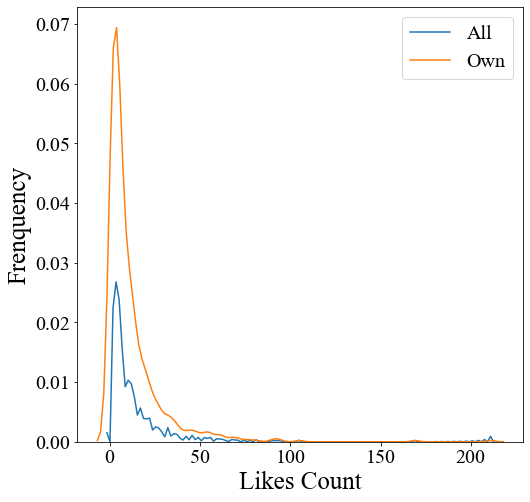

In [98]:
"""Histogram of likes count"""
plt.figure(figsize=(8, 8))
cmap = plt.get_cmap('tab20c')
sns.distplot(df.Likes, kde=True, hist=False, label='All')
sns.distplot(df_own.Likes, kde=True, hist=False, label='Own')
plt.legend(fontsize=20)
plt.xlabel('Likes Count', fontsize=25)
plt.ylabel('Frenquency', fontsize=25)
plt.tick_params(axis='both', labelsize=20)

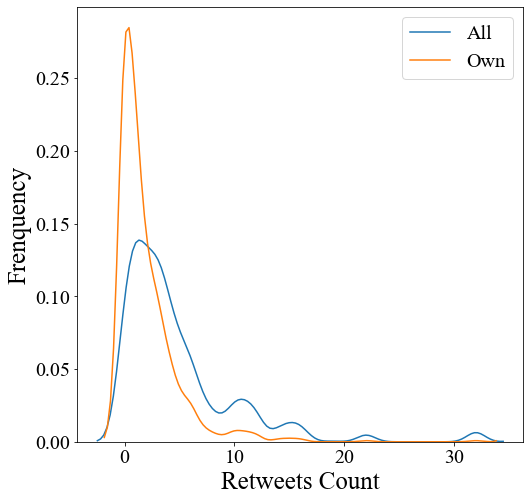

In [100]:
"""Histogram of retweets count"""
plt.figure(figsize=(8, 8))
cmap = plt.get_cmap('tab20c')
sns.distplot(df.Retweets, kde=True, hist=False,  label='All')
sns.distplot(df_own.Retweets, kde=True, hist=False,  label='Own')
plt.legend(fontsize=20)
plt.xlabel('Retweets Count', fontsize=25)
plt.ylabel('Frenquency', fontsize=25)
plt.tick_params(axis='both', labelsize=20)

In [105]:
df['day'] = pd.to_datetime(df['Date']).dt.date
df['hour'] = pd.to_datetime(df['Date']).dt.hour # 24h
df_own['day'] = pd.to_datetime(df_own['Date']).dt.date
df_own['hour'] = pd.to_datetime(df_own['Date']).dt.hour # 24h
df_own.head()

Date                                              Tweet  \
0 2020-10-18 03:07:37  Heard it was a big success @kentleach5 and @De...   
1 2020-10-18 00:57:59  As I'm thinking about my future more concretel...   
2 2020-10-18 00:44:54  @zoom_us, any chance you can partner with @Ube...   
3 2020-10-17 23:24:15  I was energized by #BMES2020. The program was ...   
4 2020-10-17 23:01:46  The #BMES2020 meeting was a great experience f...   

   Length                   ID  Likes  Retweets       user_name  \
0     140  1317663599351967744      0         0  Immunoengineer   
1     140  1317630974847483905     13         0  ianmightbecool   
2     144  1317627682079887360      0         0        abhay_br   
3     140  1317607387143032832     43         3   JohnAWhitePhD   
4     140  1317601729161043968      3         0    EmmetFrancis   

               user_ID         day  hour  
0  1316958471225593856  2020-10-18     3  
1             14046945  2020-10-18     0  
2           2519521142  2020-10-18     0  
3  1129826680250482688  2020-10-17    23  
4   973984580662251520  2020-10-17    23

In [110]:
df.groupby('day').count()

Date  Tweet  Length  tweet_ID  Likes  Retweets  user_name  \
day                                                                     
2020-10-10    19     19      19        19     19        19         19   
2020-10-11    34     34      34        34     34        34         34   
2020-10-12    63     63      63        63     63        63         63   
2020-10-13    97     97      97        97     97        97         97   
2020-10-14   735    735     735       735    735       735        735   
2020-10-15   601    601     601       601    601       601        601   
2020-10-16   521    521     521       521    521       521        521   
2020-10-17   322    322     322       322    322       322        322   
2020-10-18    15     15      15        15     15        15         15   

            user_ID  time  hour  
day                              
2020-10-10       19    19    19  
2020-10-11       34    34    34  
2020-10-12       63    63    63  
2020-10-13       97    97    97  
2020-10-14      735   735   735  
2020-10-15      601   601   601  
2020-10-16      521   521   521  
2020-10-17      322   322   322  
2020-10-18       15    15    15

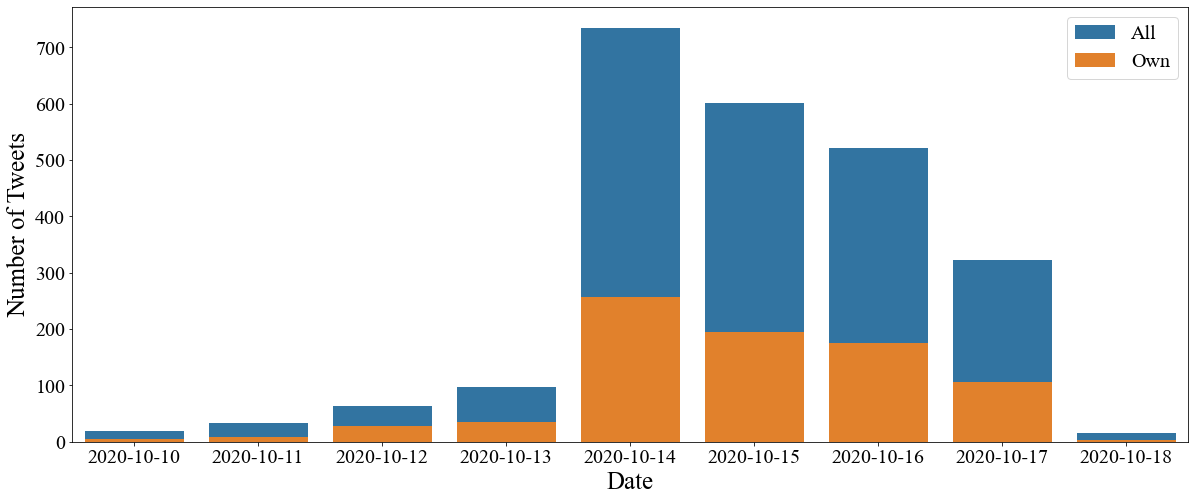

In [131]:
cmap = plt.get_cmap('tab10')
plt.figure(figsize=(20, 8))
sns.barplot(df.groupby('day').count().index, df.groupby('day').count().Date, color=cmap(0), label='All')
sns.barplot(df_own.groupby('day').count().index, df_own.groupby('day').count().Date, color=cmap(1), label='Own')
plt.legend(fontsize=20)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Number of Tweets', fontsize=25)
plt.tick_params(axis='both', labelsize=20)

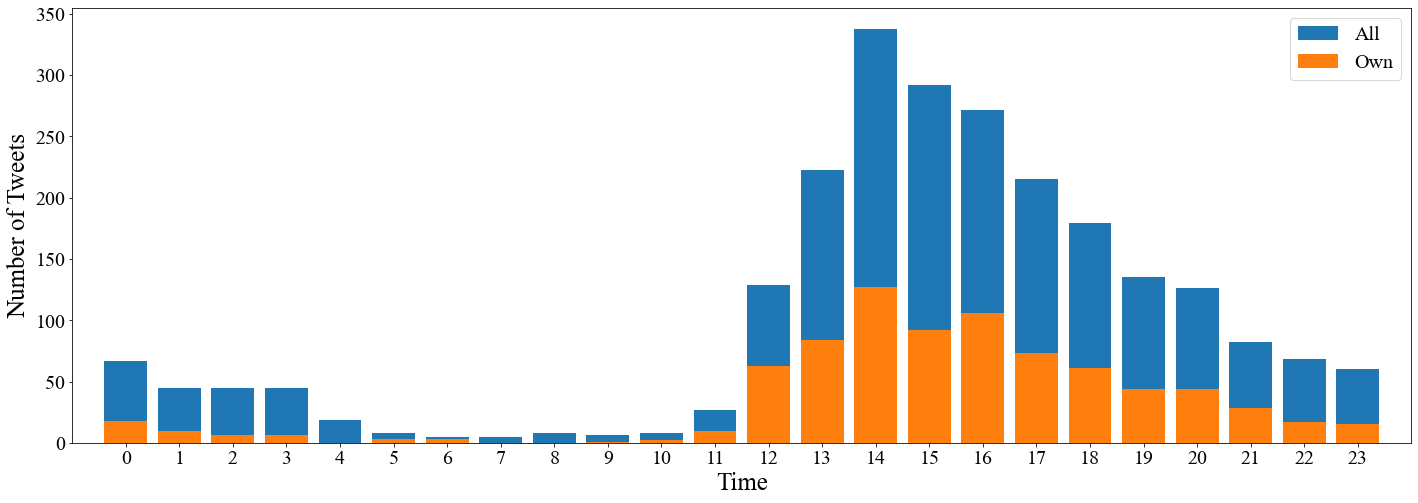

In [213]:
cmap = plt.get_cmap('tab10')
plt.figure(figsize=(24, 8))
plt.bar(df.groupby('hour').count().index, df.groupby('hour').count().Date, color=cmap(0), label='All')
plt.bar(df_own.groupby('hour').count().index, df_own.groupby('hour').count().Date, color=cmap(1), label='Own')
plt.legend(fontsize=20)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Number of Tweets', fontsize=25)
plt.xlim(-1, 24)
plt.xticks(np.arange(24))
plt.tick_params(axis='both', labelsize=20)

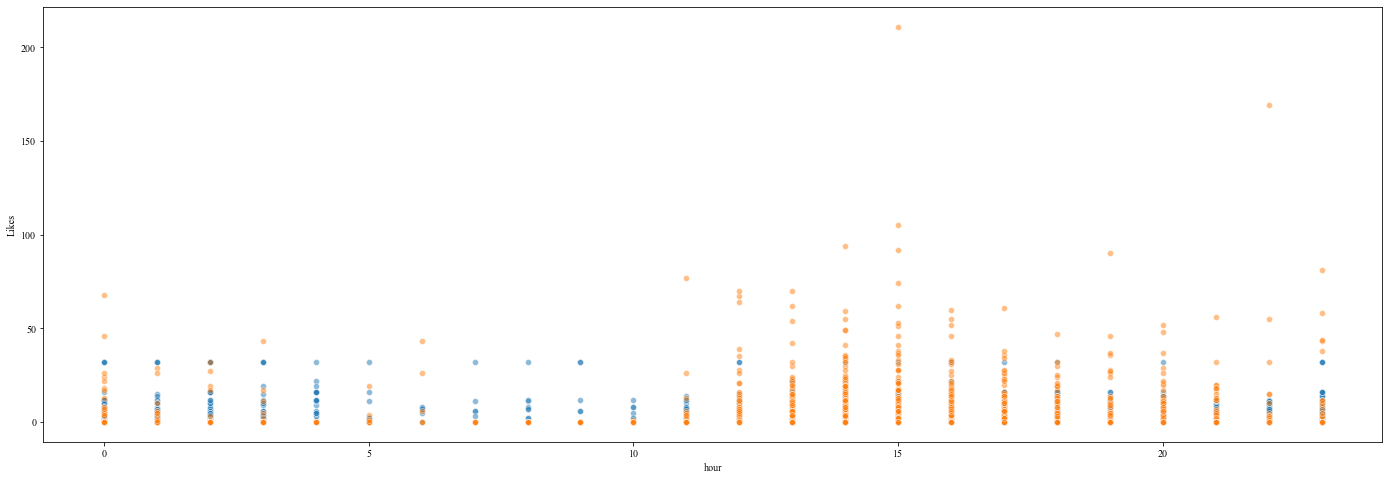

In [166]:
plt.figure(figsize=(24, 8))
sns.scatterplot(data=df, x='hour', y='Retweets', alpha=0.5)
sns.scatterplot(data=df, x='hour', y='Likes', alpha=0.5)

In [172]:
"""Analyzing the tweets sentiment"""
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
df_own['Sentiment'] = df_own['Tweet'].apply(lambda tweet: vader.polarity_scores(tweet)['compound'])
df_own.head()

Date                                              Tweet  \
0 2020-10-18 03:07:37  Heard it was a big success @kentleach5 and @De...   
1 2020-10-18 00:57:59  As I'm thinking about my future more concretel...   
2 2020-10-18 00:44:54  @zoom_us, any chance you can partner with @Ube...   
3 2020-10-17 23:24:15  I was energized by #BMES2020. The program was ...   
4 2020-10-17 23:01:46  The #BMES2020 meeting was a great experience f...   

   Length                   ID  Likes  Retweets       user_name  \
0     140  1317663599351967744      0         0  Immunoengineer   
1     140  1317630974847483905     13         0  ianmightbecool   
2     144  1317627682079887360      0         0        abhay_br   
3     140  1317607387143032832     43         3   JohnAWhitePhD   
4     140  1317601729161043968      3         0    EmmetFrancis   

               user_ID         day  hour  Sentiment  
0  1316958471225593856  2020-10-18     3     0.8356  
1             14046945  2020-10-18     0     0.4588  
2           2519521142  2020-10-18     0     0.2500  
3  1129826680250482688  2020-10-17    23     0.9299  
4   973984580662251520  2020-10-17    23     0.8221

In [231]:
df_own.sort_values('Sentiment', ascending=False).head()

Date                                              Tweet  \
398 2020-10-15 14:31:24  Fantastic and inspiring talk, thank you Prof K...   
477 2020-10-15 00:12:18  Congratulations to my AMAZING advisor for this...   
60  2020-10-17 15:13:04  @profjoycewong @Lola_UMich Amazing and Inspira...   
67  2020-10-17 14:43:42  Wow. Beautiful acknowledgment of support inter...   
3   2020-10-17 23:24:15  I was energized by #BMES2020. The program was ...   

     Length                   ID  Likes  Retweets        user_name  \
398     138  1316748516262211587     11         0      DrAnnaW_lab   
477     139  1316532314030120960      5         0  michelle_reneee   
60      134  1317483777732595713      4         1      JGreenGroup   
67      139  1317476383820554242     25         1       WillitsLab   
3       140  1317607387143032832     43         3    JohnAWhitePhD   

                 user_ID         day  hour  Sentiment  
398   724363990885912577  2020-10-15    14     0.9531  
477  1251537732637261824  2020-10-15     0     0.9406  
60             867854196  2020-10-17    15     0.9391  
67   1047138260592603136  2020-10-17    14     0.9360  
3    1129826680250482688  2020-10-17    23     0.9299

In [233]:
df_own.sort_values('Sentiment').head()

Date                                              Tweet  \
573 2020-10-14 17:21:05  1. Recognize racism and inequality is alive an...   
457 2020-10-15 12:05:00  We know our Special Session conflicts with oth...   
388 2020-10-15 14:47:31  oh hay @HCCvPDAC on the #BMES2020 presenting o...   
450 2020-10-15 12:40:32  Highlights from today's virtual #BMES2020 conf...   
550 2020-10-14 18:01:06  "You see the problem. You recognize the proble...   

     Length                   ID  Likes  Retweets     user_name  \
573     140  1316428828026327041      4         0  CatInScience   
457     140  1316711672602603527     13         3   LatinXinBME   
388     140  1316752569574846464      4         0  megankillian   
450     140  1316720614971969537      6         5      VandyBME   
550     140  1316438901100290052      1         0     FIUbiomed   

                 user_ID         day  hour  Sentiment  
573  1120512135501680640  2020-10-14    17    -0.8225  
457  1098991810968317954  2020-10-15    12    -0.6956  
388             30263292  2020-10-15    14    -0.6597  
450   862849249477877760  2020-10-15    12    -0.6597  
550           2685492829  2020-10-14    18    -0.6597

In [230]:
df_own.sort_values('Sentiment', ascending=False).iloc[2].Tweet

'@profjoycewong @Lola_UMich Amazing and Inspirational talk by @Lola_UMich at #BMES2020 ! Congrats on the @BMESociety Mid-Career Award !'

In [235]:
df_own.sort_values('Sentiment').head().iloc[1].Tweet

'We know our Special Session conflicts with other important sessions but there should be no conflicts at the start o… https://t.co/Dhy61QuoJG'

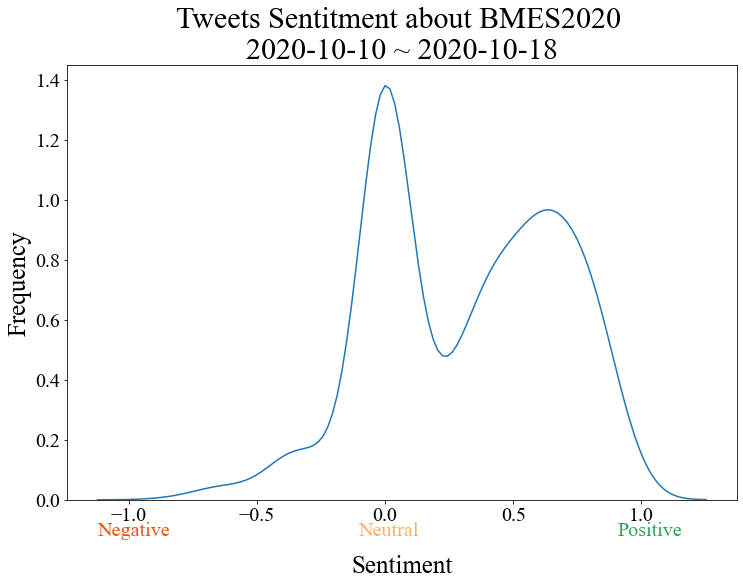

In [182]:
cmap2 = plt.get_cmap('tab20c')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
sns.distplot(df_own.Sentiment, hist=False)
plt.xlabel('Sentiment', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title('Tweets Sentitment about BMES2020 \n' + df.Date.iloc[-1].strftime("%Y-%m-%d") + ' ~ ' + df.Date.iloc[0].strftime("%Y-%m-%d"),
          fontsize=30)
ax.xaxis.labelpad = 30
ax.annotate('Positive', (0.87, -0.07), xycoords='axes fraction', va='center', ha='center',fontsize=20, color=cmap2(8))
ax.annotate('Neutral', (0.48, -0.07), xycoords='axes fraction', va='center', ha='center',fontsize=20, color=cmap2(6))
ax.annotate('Negative', (0.1, -0.07), xycoords='axes fraction', va='center', ha='center',fontsize=20, color=cmap2(4))
plt.tick_params(axis='both', labelsize=20)

In [185]:
"""Average daily sentiment """
date_senti_df_own = df_own.groupby(['day']).mean().reset_index()
date_senti_df_own

day      Length            ID      Likes  Retweets       user_ID  \
0  2020-10-10   93.400000  1.314974e+18  14.600000  2.200000  2.505391e+17   
1  2020-10-11  110.375000  1.315340e+18  30.250000  1.500000  5.245945e+17   
2  2020-10-12  134.392857  1.315681e+18  10.321429  1.678571  5.680345e+17   
3  2020-10-13  129.171429  1.316070e+18  12.371429  3.228571  3.608699e+17   
4  2020-10-14  130.984436  1.316409e+18  12.595331  1.992218  5.020349e+17   
5  2020-10-15  132.510309  1.316752e+18  12.195876  2.000000  4.795065e+17   
6  2020-10-16  132.477273  1.317119e+18   8.619318  1.784091  4.770523e+17   
7  2020-10-17  130.214953  1.317500e+18  13.457944  1.813084  4.208707e+17   
8  2020-10-18  141.333333  1.317641e+18   4.333333  0.000000  4.389862e+17   

        hour  Sentiment  
0  16.600000   0.267240  
1  17.000000   0.314888  
2  15.250000   0.253379  
3  17.028571   0.162134  
4  15.544747   0.321276  
5  14.273196   0.359251  
6  14.602273   0.252548  
7  15.859813   0.376709  
8   1.000000   0.514800

<ipython-input-198-36b5c8dfcb49>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


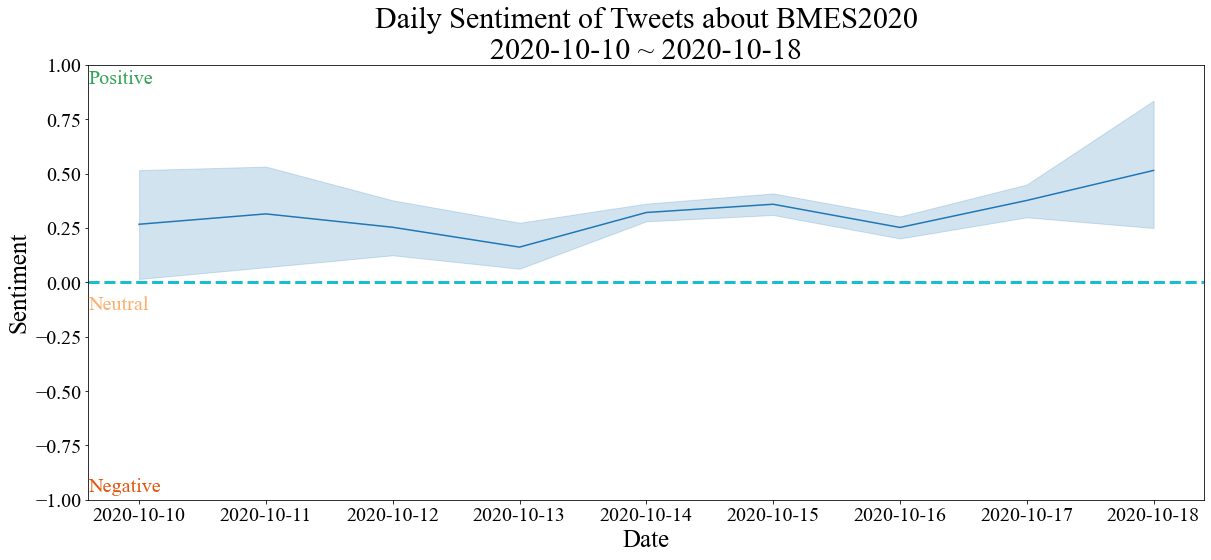

In [198]:
fig = plt.figure(figsize=(20, 8))
sns.lineplot(data=df_own, x='day', y='Sentiment')
plt.axhline(y=0, color=cmap(16), lw=3, linestyle='--')
plt.ylim(-1, 1)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Sentiment', fontsize=25)
plt.title('Daily Sentiment of Tweets about BMES2020\n' + df.Date.iloc[-1].strftime("%Y-%m-%d") + ' ~ ' + df.Date.iloc[0].strftime("%Y-%m-%d"), fontsize=30)
ax = fig.add_subplot()
ax.annotate('Positive', (0., 0.99), xycoords='axes fraction', va='top', ha='left',fontsize=20, color=cmap2(8))
ax.annotate('Neutral', (0., 0.45), xycoords='axes fraction', va='center', ha='left',fontsize=20, color=cmap2(6))
ax.annotate('Negative', (0., 0.01), xycoords='axes fraction', va='bottom', ha='left',fontsize=20, color=cmap2(4))
plt.tick_params(axis='both', labelsize=20)

<ipython-input-214-5ef4b76ec013>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


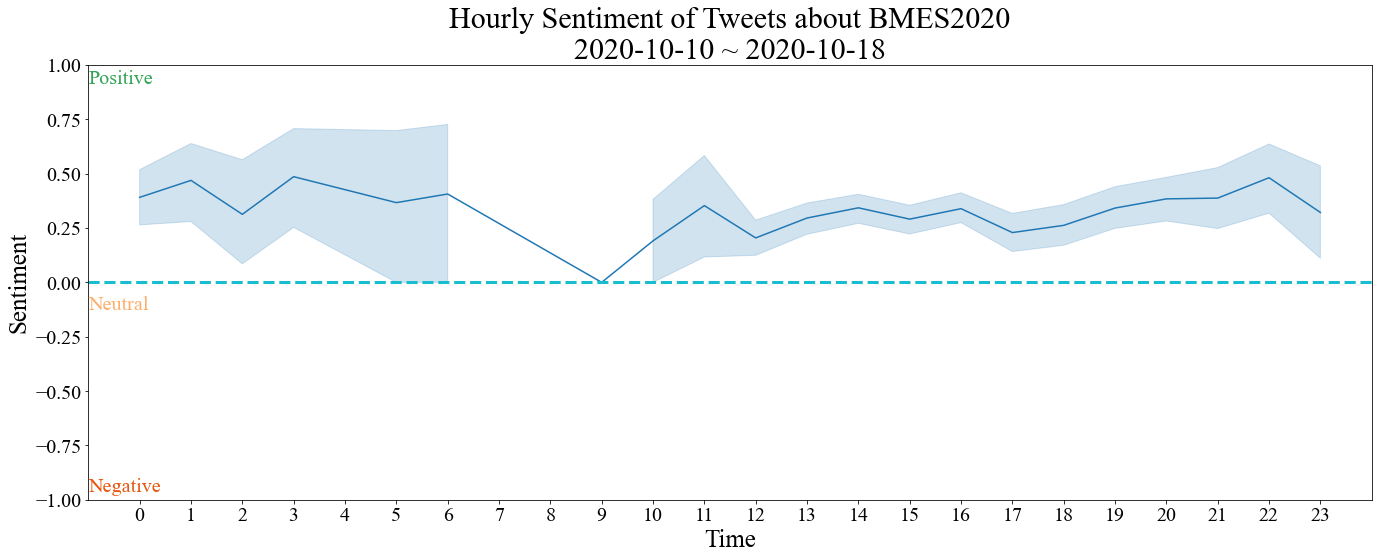

In [214]:
fig = plt.figure(figsize=(23, 8))
sns.lineplot(data=df_own, x='hour', y='Sentiment')
plt.axhline(y=0, color=cmap(16), lw=3, linestyle='--')
plt.ylim(-1, 1)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Sentiment', fontsize=25)
plt.title('Hourly Sentiment of Tweets about BMES2020\n' + df.Date.iloc[-1].strftime("%Y-%m-%d") + ' ~ ' + df.Date.iloc[0].strftime("%Y-%m-%d"), fontsize=30)
ax = fig.add_subplot()
ax.annotate('Positive', (0., 0.99), xycoords='axes fraction', va='top', ha='left',fontsize=20, color=cmap2(8))
ax.annotate('Neutral', (0., 0.45), xycoords='axes fraction', va='center', ha='left',fontsize=20, color=cmap2(6))
ax.annotate('Negative', (0., 0.01), xycoords='axes fraction', va='bottom', ha='left',fontsize=20, color=cmap2(4))
plt.xticks(np.arange(24))
plt.xlim(-1, 24)
plt.tick_params(axis='both', labelsize=20)

(-0.5, 499.5, 499.5, -0.5)

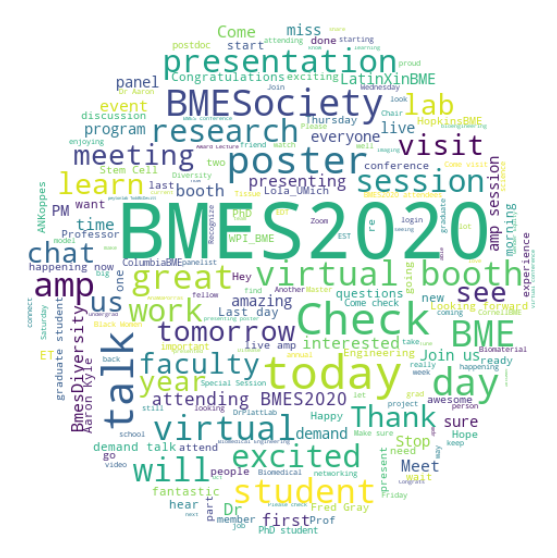

In [210]:
"""Make a wordcloud"""
text_all = " ".join(text for text in df_own.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(['HTTPS', 'CO'])

"""Masked wordcloud"""
x, y = np.ogrid[:500, :500]
mask = (x-250)**2 + (y-250)**2 > 240**2
mask = 255*mask.astype(int)

wc_mask = WordCloud(stopwords=stopwords, background_color='white',
                    colormap=plt.get_cmap('viridis'), mask=mask).generate(text_all)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.imshow(wc_mask, interpolation='bilinear')
ax.axis('off')

In [286]:

# let's define some functions to extract the interactions from tweets

def getTweetID(tweet):
    """ If properly included, get the ID of the tweet """
    return tweet.id
    
def getUserIDandScreenName(tweet):
    """ If properly included, get the tweet 
        user ID and Screen Name """
    user = tweet.user
    if user is not None:
        uid = user.id
        screen_name = user.screen_name
        return uid, screen_name
    else:
        return (None, None)

def getRetweetedUserIDandSreenName(tweet):
    """ If properly included, get the retweet 
        source user ID and Screen Name"""
    
    if hasattr(tweet, 'retweeted_status'):
        retweet = tweet.retweeted_status
        if retweet is not None:
            return getUserIDandScreenName(retweet)
        else:
            return (None, None)
    else:
        return (None, None)
    
def getRepliedUserIDandScreenName(tweet):
    """ If properly included, get the ID and Screen Name 
        of the user the tweet replies to """
    
    reply_id = tweet.in_reply_to_user_id
    reply_screenname = tweet.in_reply_to_screen_name
    return reply_id, reply_screenname
    
def getUserMentionsIDandScreenName(tweet):
    """ If properly included, return a list of IDs and Screen Names tuple
        of all user mentions, including retweeted and replied users """
        
    mentions = []
    entities = tweet.entities
    if entities is not None:
        user_mentions = entities['user_mentions']
        for mention in user_mentions:
            mention_id = mention['id']
            screen_name = mention['screen_name']
            mentions.append((mention_id, screen_name))
    
    return mentions

    
def getQuotedUserIDandScreenName(tweet):
    """ If properly included, get the ID of the user the tweet is quoting"""
    
    if hasattr(tweet, 'quoted_status'):
        quoted_status = tweet.quoted_status
        if quoted_status is not None:
            return getUserIDandScreenName(quoted_status)
        else:
            return (None, None)
    else:
        return (None, None)
    
    
def getAllInteractions(tweet):
    """ Get all the interactions from this tweet
    
        returns : (tweeter_id, tweeter_screenname), list of (interacting_id, interacting_screenname)
    """
    
    # Get the tweeter
    tweeter = getUserIDandScreenName(tweet)
    
    # Nothing to do if we couldn't get the tweeter
    if tweeter[0] is None:
        return (None, None), []
    
    # a python set is a collection of unique items
    # we use a set to avoid duplicated ids
    interacting_users = set()
    
    # Add person they're replying to
    interacting_users.add(getRepliedUserIDandScreenName(tweet))
    
    # Add person they retweeted
    interacting_users.add(getRetweetedUserIDandSreenName(tweet))
    
    # Add person they quoted
    interacting_users.add(getQuotedUserIDandScreenName(tweet))
    
    # Add mentions
    interacting_users.update(getUserMentionsIDandScreenName(tweet))
  
    # remove the tweeter if he is in the set
    interacting_users.discard(tweeter)
    # remove the None case
    interacting_users.discard((None,None))
    
    # Return our tweeter and their influencers
    return tweeter, list(interacting_users)

In [275]:
print(getUserIDandScreenName(tweets[3]))
print(getAllInteractions(tweets[4]))

tweets[100].text

(1131754932, 'peytonlab')
((967848186877480960, 'Celeste_Piotto'), [(174247756, 'Yasminalsh')])


'It’s Day 4 and we have another @WPI_BME presenter in the 3:15-4:15 PM session! Mattea Gravina is an undergraduate s… https://t.co/buBmSUu65n'

In [292]:
getAllInteractions(tweets[0])

((312553676, 'JavierCourel'),
 [(1174787309490888707, 'MU_MCW_BME'),
  (914910595727622144, 'ABMEjournal'),
  (348412940, 'bmestonybrook')])

In [295]:
import networkx as nx

# define an empty Directed Graph
# A directed graph is a graph where edges have a direction
# in our case the edges goes from user that sent the tweet to
# the user with whom they interacted (retweeted, mentioned or quoted)
G = nx.DiGraph()

# loop over all the tweets and add edges if the tweet include some interactions
for tweet in tweets:
    # find all influencers in the tweet
    tweeter, interactions = getAllInteractions(tweet)
    tweeter_id, tweeter_name = tweeter
    tweet_id = getTweetID(tweet)
    
    # add an edge to the Graph for each influencer
    for interaction in interactions:
        interact_id, interact_name = interaction
        
        # add edges between the two user ids
        # this will create new nodes if the nodes are not already in the network
        # we also add an attribute the to edge equal to the id of the tweet
        G.add_edge(tweeter_id, interact_id, tweet_id=tweet_id) # pointing from tweeter_id to interact_id
        
        # add name as a property to each node
        # with networkX each node is a dictionary
        G.nodes[tweeter_id]['name'] = tweeter_name
        G.nodes[interact_id]['name'] = interact_name

In [344]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 817
Number of edges: 2406
Average in degree:   2.9449
Average out degree:   2.9449


In [296]:
# The graph's node are contained in a dictionary 
print(type(G.nodes))

<class 'networkx.classes.reportviews.NodeView'>


In [350]:
# the keys are the user_id
nodelist = list(G.nodes.keys())
len(nodelist)

817

In [300]:
print(type(G.edges))

<class 'networkx.classes.reportviews.OutEdgeView'>


In [351]:
# we can see all the edges going out of this node
# each edge is a dictionary inside this dictionary with a key 
# corresponding to the target user_id
e = G.edges(nodelist[2])
print(e)

[(914910595727622144, 1174787309490888707), (914910595727622144, 348412940), (914910595727622144, 3148243666)]


In [325]:
G.number_of_nodes()

817

In [326]:
G.number_of_edges()

2406

In [330]:
df_own.user_ID.value_counts()

3685878676             25
1181747088188682240    24
1252695497338470400    23
3317383055             20
1098991810968317954    17
                       ..
3018465023              1
919969737194356736      1
885850360732164096      1
992071919586500608      1
2543569924              1
Name: user_ID, Length: 280, dtype: int64

In [331]:
df.user_ID.value_counts()

3685878676             144
145264769              117
274832868               38
1192490025897750529     35
763983700849602560      32
                      ... 
851732876                1
1603605517               1
16687357                 1
3018465023               1
894949743629127680       1
Name: user_ID, Length: 743, dtype: int64

In [346]:
# listing all nodes 
nodelist = list(G.nodes())
nodelist[:3]

[312553676, 1174787309490888707, 914910595727622144]

In [347]:
# degree of a node
print(G.degree(nodelist[2]))
print(G.in_degree(nodelist[2])) # edges pointing to the node
print(G.out_degree(nodelist[2])) # edges pointing out of the node

13
10
3


In [367]:
# dictionary with the degree of all nodes
all_degrees = dict(G.degree(nodelist)) # this is the degree for undirected edges
in_degrees = dict(G.in_degree(nodelist))
out_degrees = dict(G.out_degree(nodelist))

In [355]:
# average degree
2*G.number_of_edges()/G.number_of_nodes()

5.88984088127295

In [368]:
print(np.array(list(all_degrees.values())).mean())
print(np.array(list(in_degrees.values())).mean())
print(np.array(list(out_degrees.values())).mean())

5.88984088127295
2.944920440636475
2.944920440636475


In [369]:
# maximum degree
max(all_degrees.values())

202

In [376]:
# we want to make a list with (user_id, username, degree) for all nodes
degree_node_list = []
for node in nodelist:
    degree_node_list.append((node, G.nodes[node]['name'], G.degree(node)))
    
degree_node_df = pd.DataFrame(degree_node_list, columns=['node', 'user_name', 'degree'])
degree_node_df.sort_values(by='degree', ascending=False).head()

node      user_name  degree
10            145264769     BMESociety     202
24           3685878676  NonprofitJenn     131
61            274832868    AnaMaPorras     122
97  1252695497338470400  BmesDiversity     107
22            243929747       ANKoppes      74

In [380]:
degree_node_df.degree.describe()

count    817.000000
mean       5.889841
std       12.795913
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      202.000000
Name: degree, dtype: float64

In [388]:
nx.number_connected_components(G.to_undirected())

18

In [386]:
nodes = max(nx.connected_components(G.to_undirected()))
largest_subgraph = G.subgraph(nodes)
print(nx.info(largest_subgraph))

Name: 
Type: DiGraph
Number of nodes: 756
Number of edges: 2358
Average in degree:   3.1190
Average out degree:   3.1190


In [389]:
nx.number_connected_components(largest_subgraph.to_undirected())

1

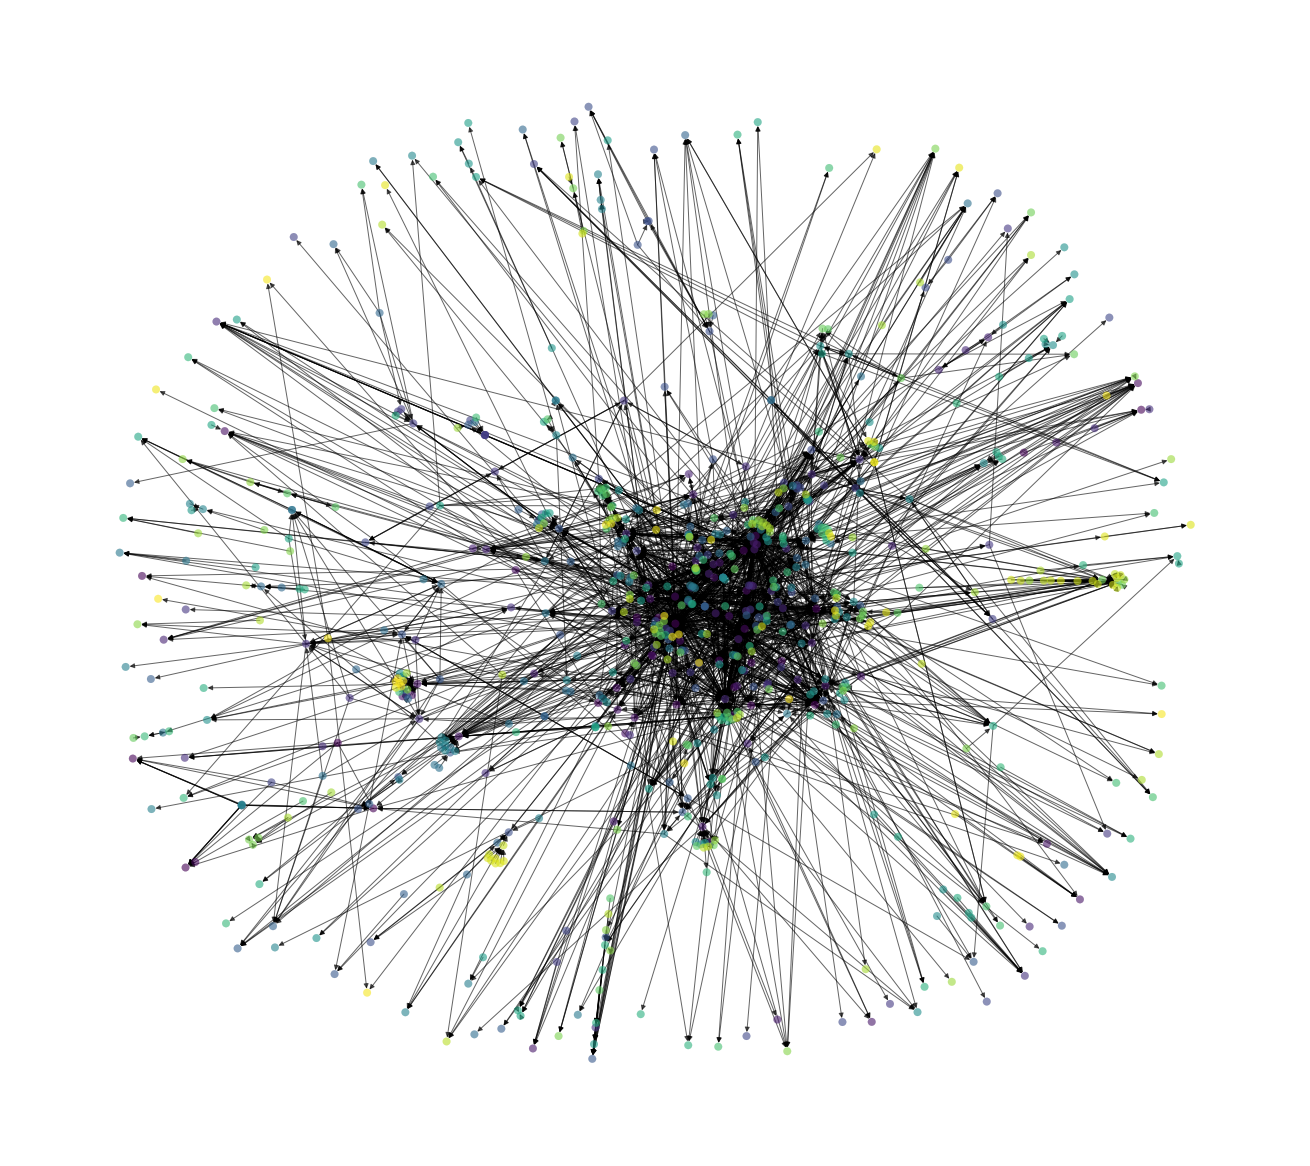

In [394]:
node_degree = largest_subgraph.degree()
pos = nx.spring_layout(largest_subgraph)#, k=0.4)
plt.figure(figsize=(18,16))
nx.draw(largest_subgraph, pos=pos, 
        linewidths=0.2, node_color=range(len(node_degree)), 
        node_size=60, alpha=0.6, with_labels=False)
#nx.draw_networkx_nodes(largest_subgraph, pos=pos, node_size=10, alpha=0.3)

In [482]:
nodes_top5 = degree_node_df.sort_values(by='degree', ascending=False).node.iloc[:5]
names_top5 = degree_node_df.sort_values(by='degree', ascending=False).user_name.iloc[:5]
degree_node_df_top5 = degree_node_df.sort_values(by='degree', ascending=False).head()
degree_node_df_top5
labels_top5 = {}
for i in range(5):
    labels_top5[degree_node_df_top5.node.iloc[i]] = degree_node_df_top5.user_name.iloc[i]
labels_top5

{145264769: 'BMESociety',
 3685878676: 'NonprofitJenn',
 274832868: 'AnaMaPorras',
 1252695497338470400: 'BmesDiversity',
 243929747: 'ANKoppes'}

(-1.1974841892719268,
 1.1901438772678374,
 -1.2024753347039223,
 1.2092849865555764)

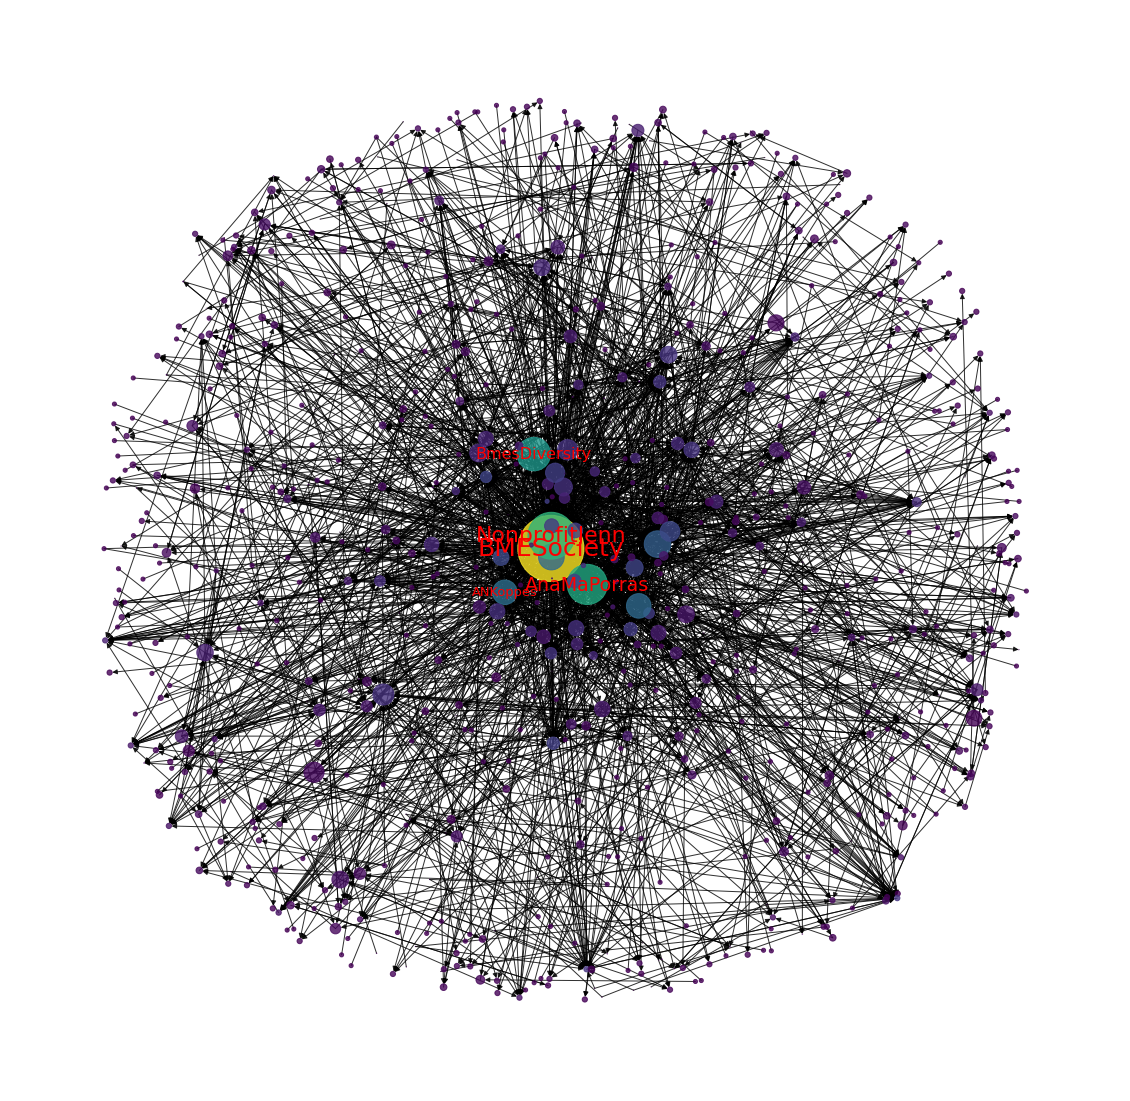

In [483]:
betCent = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=True)
node_color = [50000.0 * largest_subgraph.degree(v) for v in largest_subgraph]
node_size =  [v * 30000 for v in betCent.values()]
plt.figure(figsize=(20,20))
pos2 = nx.spring_layout(largest_subgraph, k=0.4)
nx.draw_networkx(largest_subgraph, pos=pos2, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.8)
for i in range(5):
    nx.draw_networkx_labels(largest_subgraph, pos=pos2, labels={nodes_top5.iloc[i]: names_top5.iloc[i]}, 
                            font_size=25-i*3, font_color='red')
plt.axis('off')

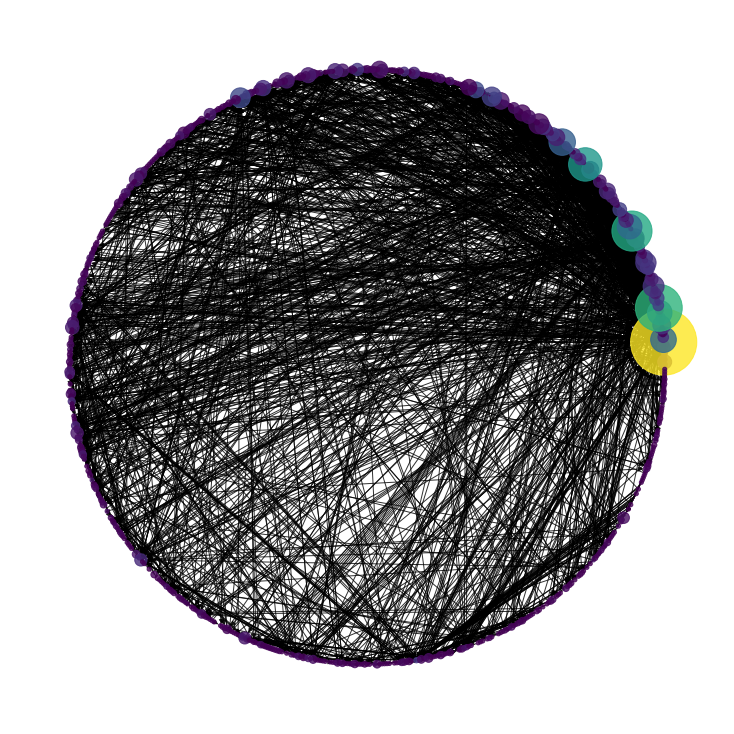

In [409]:
plt.figure(figsize=(10,10))
nx.draw_circular(largest_subgraph, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.8)

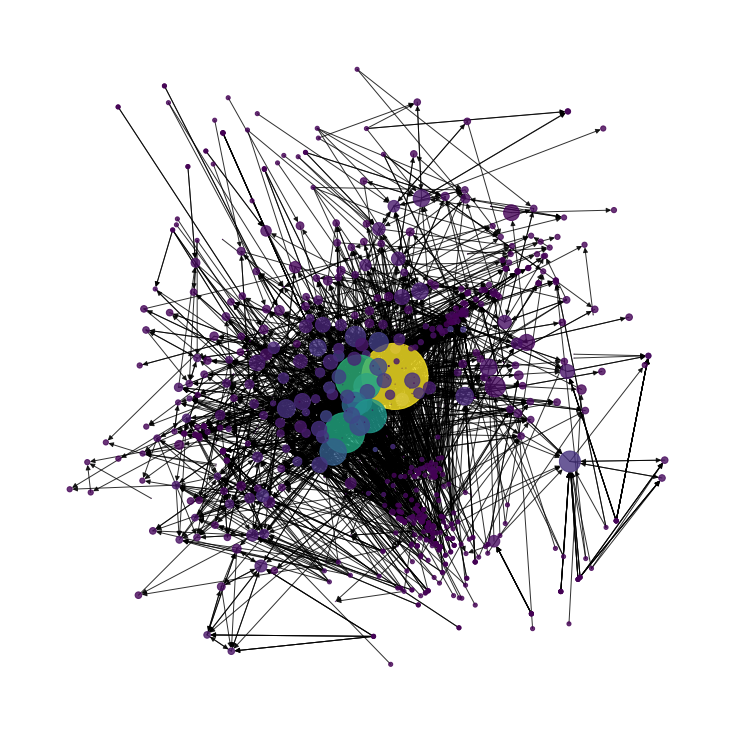

In [410]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(largest_subgraph, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.8)

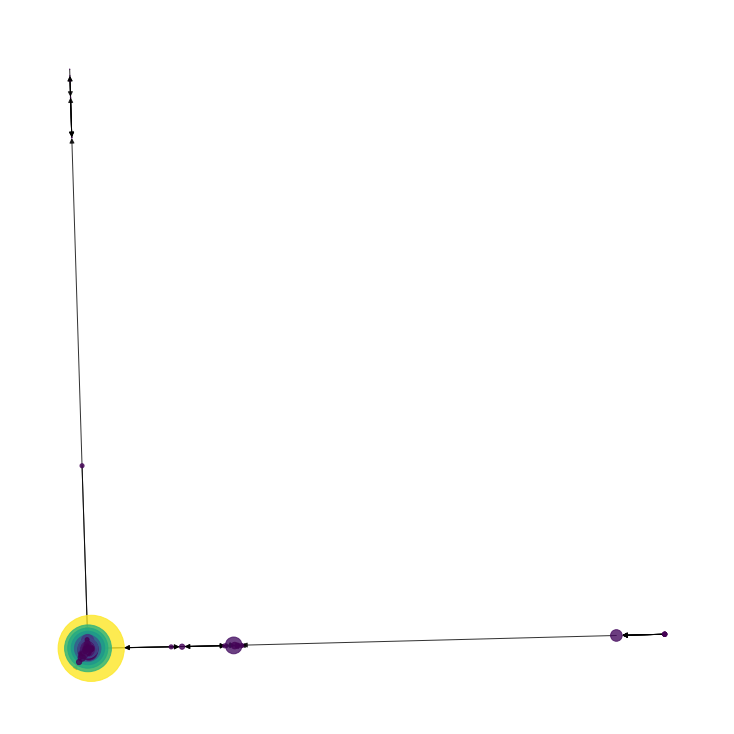

In [413]:
plt.figure(figsize=(10,10))
nx.draw_spectral(largest_subgraph, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.8)

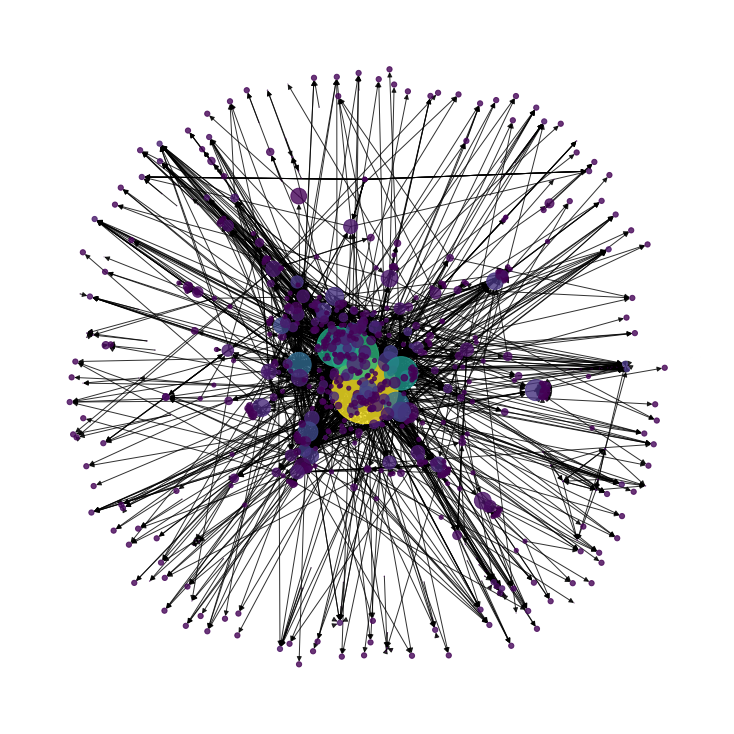

In [414]:
plt.figure(figsize=(10,10))
nx.draw_spring(largest_subgraph, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.8)

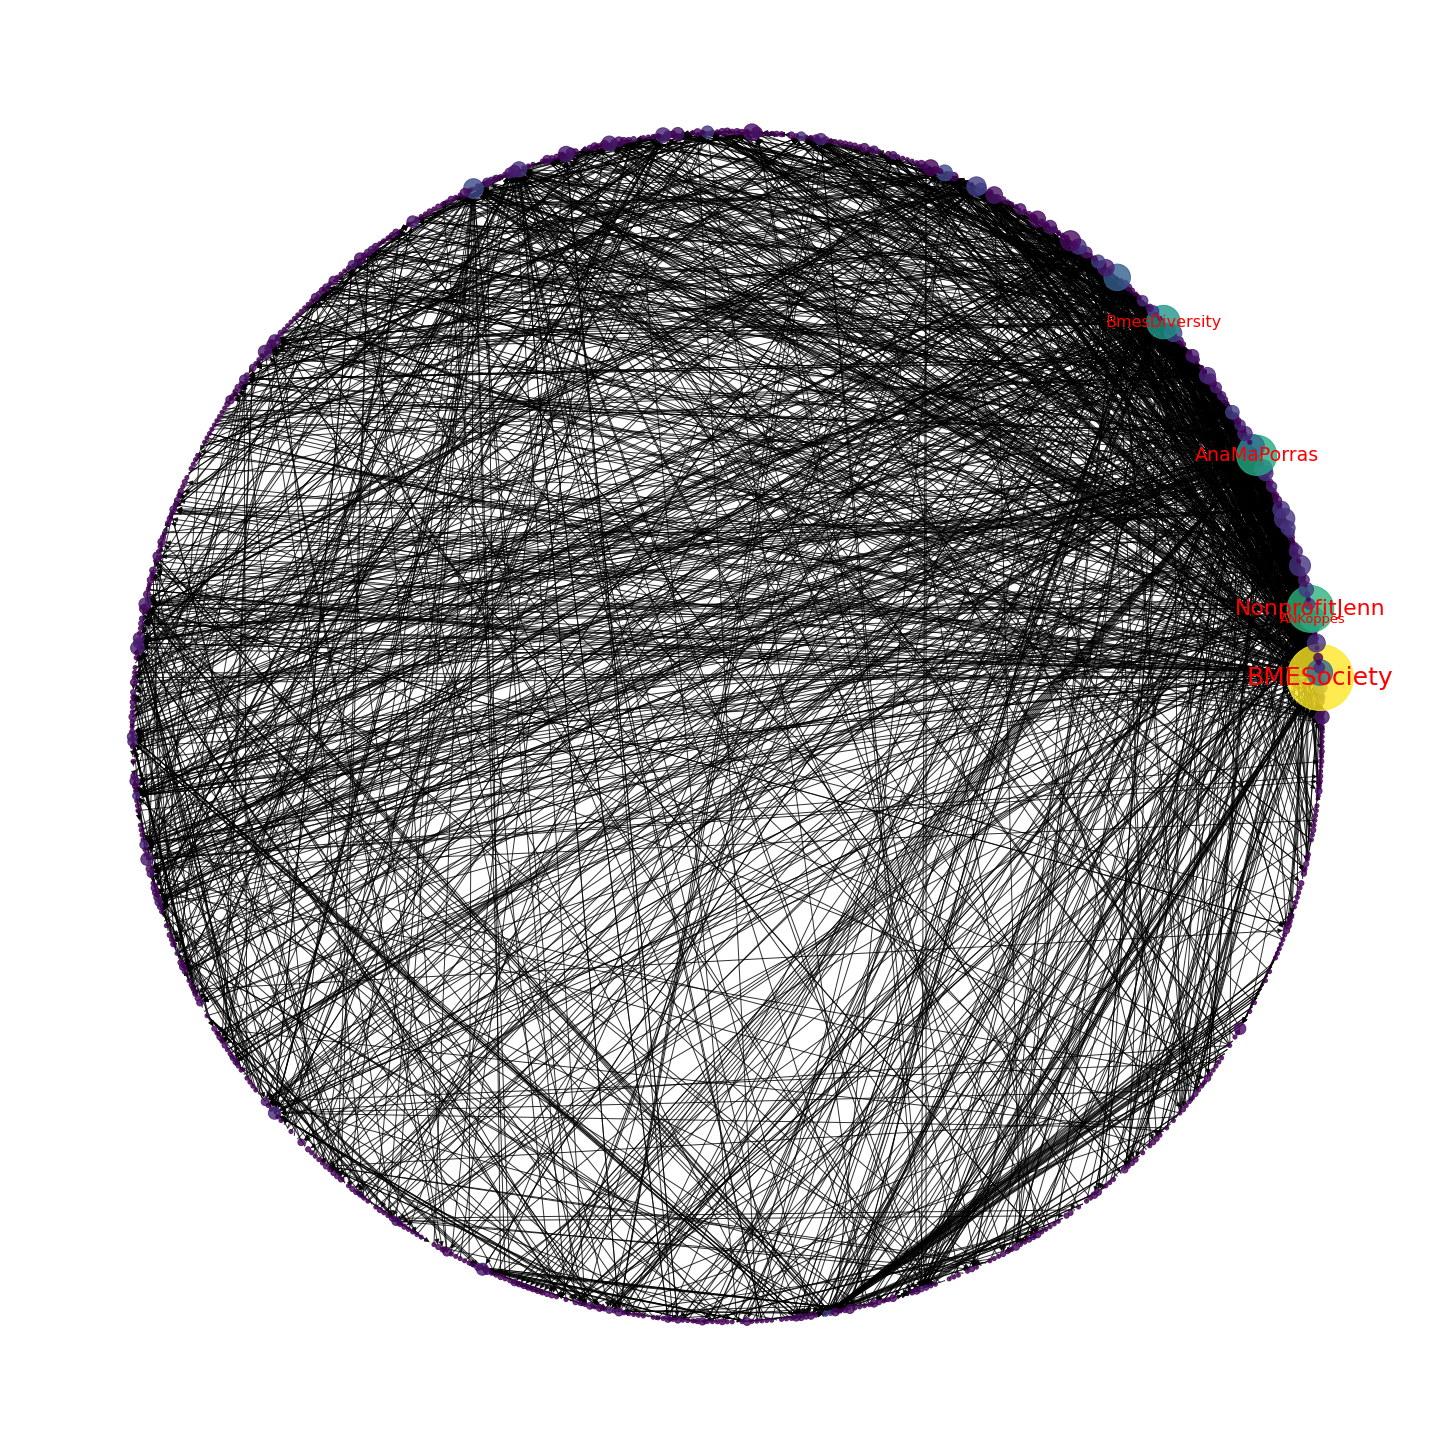

In [479]:
plt.figure(figsize=(20,20))
nx.draw_shell(largest_subgraph, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.8)
for i in range(5):
    nx.draw_networkx_labels(largest_subgraph, pos=nx.circular_layout(largest_subgraph), labels={nodes_top5.iloc[i]: names_top5.iloc[i]}, 
                            font_size=25-i*3, font_color='red')

In [484]:
nx.average_shortest_path_length(largest_subgraph)

1.0526735344616138

In [501]:
from pyvis.network import Network
net = Network(height="850px", width="100%", bgcolor="#222222", 
              font_color="white", directed=True, notebook=True)
net.toggle_physics(False)
net.from_nx(largest_subgraph)
#net.show("interactive_graph.html")